# Tabular models

In [0]:
from fastai.tabular import *

Tabular data should be in a Pandas `DataFrame`.

In [3]:
path = untar_data(URLs.ADULT_SAMPLE)
df = pd.read_csv(path/'adult.csv')

In [4]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,49,Private,101320,Assoc-acdm,12.0,Married-civ-spouse,NaN,Wife,White,Female,0,1902,40,United-States,>=50k
1,44,Private,236746,Masters,14.0,Divorced,Exec-managerial,Not-in-family,White,Male,10520,0,45,United-States,>=50k
2,38,Private,96185,HS-grad,NaN,Divorced,NaN,Unmarried,Black,Female,0,0,32,United-States,<50k
3,38,Self-emp-inc,112847,Prof-school,15.0,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,United-States,>=50k
4,42,Self-emp-not-inc,82297,7th-8th,NaN,Married-civ-spouse,Other-service,Wife,Black,Female,0,0,50,United-States,<50k


In [0]:
dep_var = 'salary'
cat_names = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race']
cont_names = ['age', 'fnlwgt', 'education-num']
procs = [FillMissing, Categorify, Normalize]

In [0]:
test = TabularList.from_df(df.iloc[800:1000].copy(), path=path, cat_names=cat_names, cont_names=cont_names)

In [0]:
data = (TabularList.from_df(df, path=path, cat_names=cat_names, cont_names=cont_names, procs=procs)
                           .split_by_idx(list(range(800,1000)))
                           .label_from_df(cols=dep_var)
                           .add_test(test)
                           .databunch())

In [15]:
data.show_batch(rows=10)

workclass,education,marital-status,occupation,relationship,race,education-num_na,age,fnlwgt,education-num,target
Private,HS-grad,Married-civ-spouse,Sales,Husband,White,False,0.6166,-1.1567,-0.4224,>=50k
Private,Masters,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,False,0.0303,-1.0466,1.5334,>=50k
Private,HS-grad,Separated,Exec-managerial,Unmarried,White,False,-0.3362,-0.7087,-0.4224,<50k
Private,HS-grad,Separated,Handlers-cleaners,Not-in-family,Black,False,0.1769,0.2442,-0.4224,<50k
Local-gov,12th,Widowed,Exec-managerial,Not-in-family,White,False,1.9360,-0.3397,-0.8135,<50k
Self-emp-not-inc,Some-college,Married-civ-spouse,Adm-clerical,Wife,White,False,-0.1163,0.7809,-0.0312,<50k
Private,HS-grad,Married-civ-spouse,Handlers-cleaners,Husband,White,False,0.1769,-0.7243,-0.4224,<50k
Federal-gov,Bachelors,Married-civ-spouse,Craft-repair,Husband,White,False,0.6166,-1.6000,1.1422,<50k
Private,Some-college,Divorced,Adm-clerical,Unmarried,White,False,0.7632,-0.0114,-0.0312,<50k
Local-gov,Some-college,Divorced,Adm-clerical,Not-in-family,White,False,0.3235,1.4008,-0.0312,<50k


In [0]:
learn = tabular_learner(data, layers=[200,100], metrics=accuracy)

In [22]:
learn.fit_one_cycle(6, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.356528,0.373521,0.835000,00:06
1,0.358527,0.372043,0.850000,00:06
2,0.365415,0.369283,0.820000,00:06
3,0.345862,0.360464,0.850000,00:06
4,0.346901,0.349587,0.835000,00:06
5,0.338212,0.348964,0.835000,00:06


epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


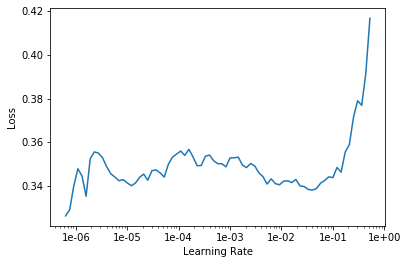

In [30]:
lr_find(learn)
learn.recorder.plot()

In [32]:
learn.fit_one_cycle(10, slice(1e-03/2))

epoch,train_loss,valid_loss,accuracy,time
0,0.347829,0.344692,0.830000,00:07
1,0.347542,0.341287,0.840000,00:07
2,0.337789,0.343707,0.840000,00:07
3,0.349000,0.345067,0.840000,00:06
4,0.359355,0.343118,0.840000,00:07
5,0.345364,0.341662,0.835000,00:07
6,0.350393,0.343272,0.835000,00:07
7,0.347071,0.342276,0.830000,00:06
8,0.340198,0.343493,0.835000,00:07
9,0.336523,0.343077,0.840000,00:07


## Inference

In [0]:
row = df.iloc[2]

In [34]:
learn.predict(row)

(Category <50k, tensor(0), tensor([0.9899, 0.0101]))